In [1]:
import pandas as pd
import numpy as np

from validation_utils import transform_data_for_inference, line_color, downsample_df, run_inference, calculate_error, run_validation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('ggplot')

%matplotlib inline

## 🔍 Model Validation

### ✅ Problem Observed:
Despite achieving **95%+ accuracy during training**, the model behaves inconsistently in real-time inference on the ESP32. Specifically, it appears to be **overly sensitive**, producing **multiple detections for a single gesture**. This mismatch indicates that offline evaluation metrics alone are not enough.

---

### 🧪 Validation Dataset:
To investigate this issue further, a **validation dataset** was created containing live recordings of:
- `circle` gestures
- `X` axis movements
- `Y` axis movements

Each validation set contains **5–6 gestures**, captured in a live-like environment.

---

### 🔄 Live Inference Emulation:
Instead of batch predictions, a **sliding window inference** method was used to emulate real-time gesture detection:
- The model makes an inference at every step as the window slides over the time-series.
- This helps simulate how the model would perform on live streamed sensor data.

> **Note:** Despite high accuracy, the models sometimes gave **incorrect labels repeatedly** for the same movement.

---

### 📏 Evaluation Equations:
To quickly measure performance on these unlabeled validation sets, a ratio-based error calculation was used:

| **Label** | **Equation** | **Interpretation** |
|----------|-------------|---------------------|
| `Circle` | `circle_error = (X + Y) / (X + Y + Circle)` | Fraction of incorrect (X or Y) labels during circle gestures |
| `X`      | `x_error = (Circle + Y) / (X + Y + Circle)` | Fraction of incorrect (Circle or Y) labels during X gestures |
| `Y`      | `y_error = (Circle + X) / (X + Y + Circle)` | Fraction of incorrect (Circle or X) labels during Y gestures |

These equations help **quantify misclassifications** without manually labeling each inference window.

---

### 📊 Base Data Model Validation:
This process was repeated for the models trained on the base dataset (with different sampling frequencies) to understand their real-time robustness.


In [2]:
from models.baseline.base.decision_tree import decision_tree_100hz, decision_tree_50hz, decision_tree_25hz, decision_tree_20hz, decision_tree_10hz
from models.baseline.base.random_forest import random_forest_100hz, random_forest_50hz, random_forest_25hz, random_forest_20hz, random_forest_10hz

models = [
    (decision_tree_100hz, 100, (0,0), 'decision_tree'),
    (decision_tree_50hz, 50, (0,1), 'decision_tree'),
    (decision_tree_25hz, 25, (0,2), 'decision_tree'),
    (decision_tree_20hz, 20, (0,3), 'decision_tree'),
    (decision_tree_10hz, 10, (0,4), 'decision_tree'),
    (random_forest_100hz, 100, (1,0), 'random_forest'),
    (random_forest_50hz, 50, (1,1), 'random_forest'),
    (random_forest_25hz, 25, (1,2), 'random_forest'),
    (random_forest_20hz, 20, (1,3), 'random_forest'),
    (random_forest_10hz, 10, (1,4), 'random_forest')
]

In [4]:
results_base_circle = run_validation(models, 'data/validation/move_circle_20210522_1.csv', 'base', is_plot=False, is_save_results=True)
results_base_x = run_validation(models, 'data/validation/move_x_20210522_1.csv', 'base', is_plot=False, is_save_results=True)
results_base_y = run_validation(models, 'data/validation/move_y_20210522_1.csv', 'base', is_plot=False, is_save_results=True)

In [5]:
import os

# Create the directory if it doesn't exist
os.makedirs('output/validation', exist_ok=True)

# Centered data model validation

In [6]:
from models.baseline.centered.decision_tree import decision_tree_100hz, decision_tree_50hz, decision_tree_25hz, decision_tree_20hz, decision_tree_10hz
from models.baseline.centered.random_forest import random_forest_100hz, random_forest_50hz, random_forest_25hz, random_forest_20hz, random_forest_10hz

models = [
    (decision_tree_100hz, 100, (0,0), 'decision_tree'),
    (decision_tree_50hz, 50, (0,1), 'decision_tree'),
    (decision_tree_25hz, 25, (0,2), 'decision_tree'),
    (decision_tree_20hz, 20, (0,3), 'decision_tree'),
    (decision_tree_10hz, 10, (0,4), 'decision_tree'),
    (random_forest_100hz, 100, (1,0), 'random_forest'),
    (random_forest_50hz, 50, (1,1), 'random_forest'),
    (random_forest_25hz, 25, (1,2), 'random_forest'),
    (random_forest_20hz, 20, (1,3), 'random_forest'),
    (random_forest_10hz, 10, (1,4), 'random_forest')
]

In [7]:
results_centered_circle = run_validation(models, 'data/validation/move_circle_20210522_1.csv', 'centered', is_plot=False, is_save_results=True)
results_centered_x = run_validation(models, 'data/validation/move_x_20210522_1.csv', 'centered', is_plot=False, is_save_results=True)
results_centered_y = run_validation(models, 'data/validation/move_y_20210522_1.csv', 'centered', is_plot=False, is_save_results=True)

# Centered + Augmentation data model validation

In [8]:
from models.baseline.centered_aug.decision_tree import decision_tree_100hz, decision_tree_50hz, decision_tree_25hz, decision_tree_20hz, decision_tree_10hz
from models.baseline.centered_aug.random_forest import random_forest_100hz, random_forest_50hz, random_forest_25hz, random_forest_20hz, random_forest_10hz

models = [
    (decision_tree_100hz, 100, (0,0), 'decision_tree'),
    (decision_tree_50hz, 50, (0,1), 'decision_tree'),
    (decision_tree_25hz, 25, (0,2), 'decision_tree'),
    (decision_tree_20hz, 20, (0,3), 'decision_tree'),
    (decision_tree_10hz, 10, (0,4), 'decision_tree'),
    (random_forest_100hz, 100, (1,0), 'random_forest'),
    (random_forest_50hz, 50, (1,1), 'random_forest'),
    (random_forest_25hz, 25, (1,2), 'random_forest'),
    (random_forest_20hz, 20, (1,3), 'random_forest'),
    (random_forest_10hz, 10, (1,4), 'random_forest')
    ]

In [9]:
results_centered_aug_circle = run_validation(models, 'data/validation/move_circle_20210522_1.csv', 'centered_aug', is_plot=False, is_save_results=True)
results_centered_aug_x = run_validation(models, 'data/validation/move_x_20210522_1.csv', 'centered_aug', is_plot=False, is_save_results=True)
results_centered_aug_y = run_validation(models, 'data/validation/move_y_20210522_1.csv', 'centered_aug', is_plot=False, is_save_results=True)

Centered + SMOTE data model validation

In [10]:
from models.baseline.centered_smote.decision_tree import decision_tree_100hz, decision_tree_50hz, decision_tree_25hz, decision_tree_20hz, decision_tree_10hz
from models.baseline.centered_smote.random_forest import random_forest_100hz, random_forest_50hz, random_forest_25hz, random_forest_20hz, random_forest_10hz

models = [
    (decision_tree_100hz, 100, (0,0), 'decision_tree'),
    (decision_tree_50hz, 50, (0,1), 'decision_tree'),
    (decision_tree_25hz, 25, (0,2), 'decision_tree'),
    (decision_tree_20hz, 20, (0,3), 'decision_tree'),
    (decision_tree_10hz, 10, (0,4), 'decision_tree'),
    (random_forest_100hz, 100, (1,0), 'random_forest'),
    (random_forest_50hz, 50, (1,1), 'random_forest'),
    (random_forest_25hz, 25, (1,2), 'random_forest'),
    (random_forest_20hz, 20, (1,3), 'random_forest'),
    (random_forest_10hz, 10, (1,4), 'random_forest')
    ]

In [11]:
results_centered_smote_circle = run_validation(models, 'data/validation/move_circle_20210522_1.csv',  'centered_smote', is_plot=False, is_save_results=True)
results_centered_smote_x = run_validation(models, 'data/validation/move_x_20210522_1.csv', 'centered_smote', is_plot=False, is_save_results=True)
results_centered_smote_y = run_validation(models, 'data/validation/move_y_20210522_1.csv', 'centered_smote', is_plot=False, is_save_results=True)

'End' data model validation

In [12]:
from models.baseline.end.decision_tree import decision_tree_100hz, decision_tree_50hz, decision_tree_25hz, decision_tree_20hz, decision_tree_10hz
from models.baseline.end.random_forest import random_forest_100hz, random_forest_50hz, random_forest_25hz, random_forest_20hz, random_forest_10hz

models = [
    (decision_tree_100hz, 100, (0,0), 'decision_tree'),
    (decision_tree_50hz, 50, (0,1), 'decision_tree'),
    (decision_tree_25hz, 25, (0,2), 'decision_tree'),
    (decision_tree_20hz, 20, (0,3), 'decision_tree'),
    (decision_tree_10hz, 10, (0,4), 'decision_tree'),
    (random_forest_100hz, 100, (1,0), 'random_forest'),
    (random_forest_50hz, 50, (1,1), 'random_forest'),
    (random_forest_25hz, 25, (1,2), 'random_forest'),
    (random_forest_20hz, 20, (1,3), 'random_forest'),
    (random_forest_10hz, 10, (1,4), 'random_forest')
]

In [13]:
results_end_circle = run_validation(models, 'data/validation/move_circle_20210522_1.csv', 'end', is_plot=False, is_save_results=True)
results_end_x = run_validation(models, 'data/validation/move_x_20210522_1.csv', 'end', is_plot=False, is_save_results=True)
results_end_y = run_validation(models, 'data/validation/move_y_20210522_1.csv', 'end', is_plot=False, is_save_results=True)

In [14]:
# reading saved eval data (OPTIONAL)
results_base_circle = pd.read_csv('output/validation/val_res_base_circle.csv')
results_base_x = pd.read_csv('output/validation/val_res_base_x.csv')
results_base_y = pd.read_csv('output/validation/val_res_base_y.csv')

results_centered_circle = pd.read_csv('output/validation/val_res_centered_circle.csv')
results_centered_x = pd.read_csv('output/validation/val_res_centered_x.csv')
results_centered_y = pd.read_csv('output/validation/val_res_centered_y.csv')

results_centered_aug_circle = pd.read_csv('output/validation/val_res_centered_aug_circle.csv')
results_centered_aug_x = pd.read_csv('output/validation/val_res_centered_aug_x.csv')
results_centered_aug_y = pd.read_csv('output/validation/val_res_centered_aug_y.csv')

results_centered_smote_circle = pd.read_csv('output/validation/val_res_centered_smote_circle.csv')
results_centered_smote_x = pd.read_csv('output/validation/val_res_centered_smote_x.csv')
results_centered_smote_y = pd.read_csv('output/validation/val_res_centered_smote_y.csv')

results_end_circle = pd.read_csv('output/validation/val_res_end_circle.csv')
results_end_x = pd.read_csv('output/validation/val_res_end_x.csv')
results_end_y = pd.read_csv('output/validation/val_res_end_y.csv')

# plotting evaluation results

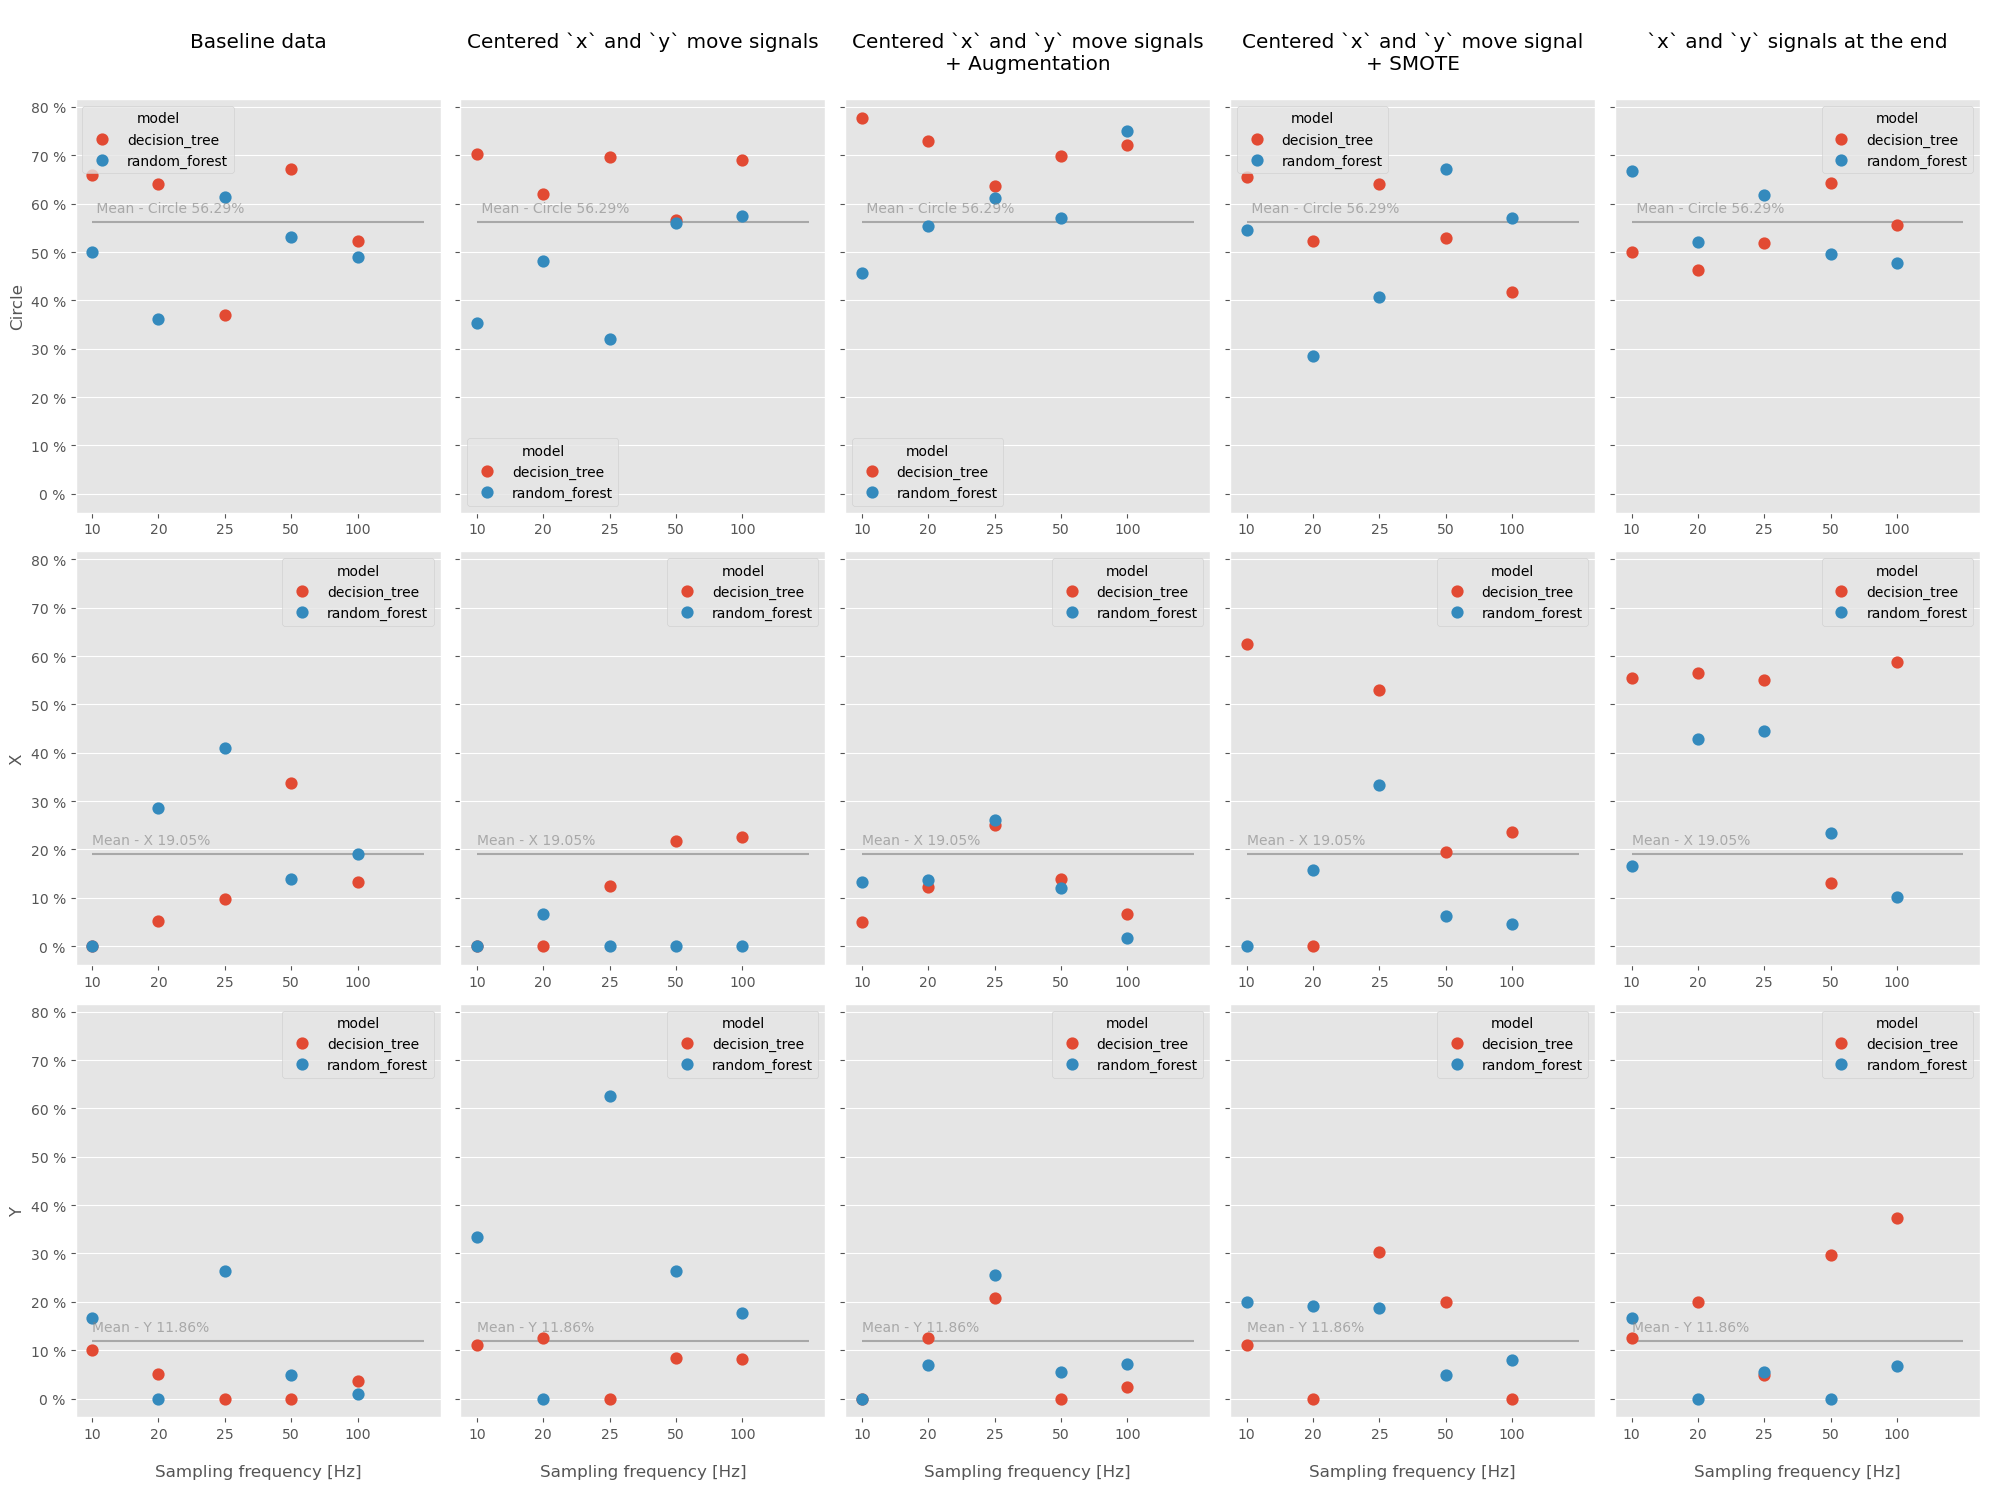

In [15]:
import matplotlib.ticker as tick

fig, ax = plt.subplots(ncols=5, nrows=3, sharey=True, figsize=(20,15))

sns.pointplot(data=pd.DataFrame(results_base_circle), x='hz', y='error_percentage', hue='model', ax=ax[0][0], linestyles='')
sns.pointplot(data=pd.DataFrame(results_base_x), x='hz', y='error_percentage', hue='model', ax=ax[1][0], linestyles='')
sns.pointplot(data=pd.DataFrame(results_base_y), x='hz', y='error_percentage', hue='model', ax=ax[2][0], linestyles='')

sns.pointplot(data=pd.DataFrame(results_centered_circle), x='hz', y='error_percentage', hue='model', ax=ax[0][1], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_x), x='hz', y='error_percentage', hue='model', ax=ax[1][1], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_y), x='hz', y='error_percentage', hue='model', ax=ax[2][1], linestyles='')

sns.pointplot(data=pd.DataFrame(results_centered_aug_circle), x='hz', y='error_percentage', hue='model', ax=ax[0][2], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_aug_x), x='hz', y='error_percentage', hue='model', ax=ax[1][2], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_aug_y), x='hz', y='error_percentage', hue='model', ax=ax[2][2], linestyles='')

sns.pointplot(data=pd.DataFrame(results_centered_smote_circle), x='hz', y='error_percentage', hue='model', ax=ax[0][3], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_smote_x), x='hz', y='error_percentage', hue='model', ax=ax[1][3], linestyles='')
sns.pointplot(data=pd.DataFrame(results_centered_smote_y), x='hz', y='error_percentage', hue='model', ax=ax[2][3], linestyles='')

sns.pointplot(data=pd.DataFrame(results_end_circle), x='hz', y='error_percentage', hue='model', ax=ax[0][4], linestyles='')
sns.pointplot(data=pd.DataFrame(results_end_x), x='hz', y='error_percentage', hue='model', ax=ax[1][4], linestyles='')
sns.pointplot(data=pd.DataFrame(results_end_y), x='hz', y='error_percentage', hue='model', ax=ax[2][4], linestyles='')

ax[0][0].title.set_text('\nBaseline data\n\n')
ax[0][1].title.set_text('\nCentered `x` and `y` move signals\n\n')
ax[0][2].title.set_text('\nCentered `x` and `y` move signals\n+ Augmentation\n')
ax[0][3].title.set_text('\nCentered `x` and `y` move signal\n+ SMOTE\n')
ax[0][4].title.set_text('\n`x` and `y` signals at the end\n\n')

ax[0][0].set_ylabel('Circle')
ax[1][0].set_ylabel('X')
ax[2][0].set_ylabel('Y')


results_circle = pd.concat([results_base_circle, results_centered_circle, results_centered_aug_circle, results_centered_smote_circle, results_end_circle])
results_x = pd.concat([results_base_x, results_centered_x, results_centered_aug_x, results_centered_smote_x, results_end_x])
results_y = pd.concat([results_base_y, results_centered_y, results_centered_aug_y, results_centered_smote_y, results_end_y])


mean_error_circle = results_circle['error_percentage'].mean()
mean_error_x = results_x['error_percentage'].mean()
mean_error_y = results_y['error_percentage'].mean()


# plot circle mean
for c in range(5):
    ax[0][c].hlines(y=mean_error_circle, xmin=0, xmax=5, color='grey', alpha=0.6, zorder=0)
    ax[0][c].text(x=0, y=mean_error_circle+2, s=f' Mean - Circle {mean_error_circle:.2f}%', color='grey',alpha=0.6)
    
# plot x mean
for c in range(5):
    ax[1][c].hlines(y=mean_error_x, xmin=0, xmax=5, color='grey', alpha=0.6, zorder=0)
    ax[1][c].text(x=0, y=mean_error_x+2, s=f'Mean - X {mean_error_x:.2f}%', color='grey',alpha=0.6)

# plot y mean
for c in range(5):
    ax[2][c].hlines(y=mean_error_y, xmin=0, xmax=5, color='grey', alpha=0.6, zorder=0)
    ax[2][c].text(x=0, y=mean_error_y+2, s=f'Mean - Y {mean_error_y:.2f}%', color='grey',alpha=0.6)

    
# removes circle, x, y labels
for c in range(1,4):
    for r in range(3):
        ax[r][c].set_ylabel('')

# removes sampling frequency label
for r in range(2):
    for c in range(5):
        ax[r][c].set_xlabel('')

# sets x label of the bottom row
for c in range(5):
    ax[2][c].set_xlabel('\nSampling frequency [Hz]')

plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(lambda x, post: f'{int(x)} %'))
fig.tight_layout();

In [16]:
# get base dataset as DFs
df_base_circle = pd.DataFrame(results_base_circle)
df_base_x = pd.DataFrame(results_base_x)
df_base_y = pd.DataFrame(results_base_y)

df_base_circle['move'] = 'circle'
df_base_x['move'] = 'x'
df_base_y['move'] = 'y'

In [17]:
# get centered dataset as DFs
df_centered_circle = pd.DataFrame(results_centered_circle)
df_centered_x = pd.DataFrame(results_centered_x)
df_centered_y = pd.DataFrame(results_centered_y)

df_centered_circle['move'] = 'circle'
df_centered_x['move'] = 'x'
df_centered_y['move'] = 'y'

In [18]:
# get centered + augmented dataset as DFs
df_centered_aug_circle = pd.DataFrame(results_centered_aug_circle)
df_centered_aug_x = pd.DataFrame(results_centered_aug_x)
df_centered_aug_y = pd.DataFrame(results_centered_aug_y)

df_centered_aug_circle['move'] = 'circle'
df_centered_aug_x['move'] = 'x'
df_centered_aug_y['move'] = 'y'

In [19]:
# get centered + SMOTE dataset as DFs
df_centered_smote_circle = pd.DataFrame(results_centered_smote_circle)
df_centered_smote_x = pd.DataFrame(results_centered_smote_x)
df_centered_smote_y = pd.DataFrame(results_centered_smote_y)

df_centered_smote_circle['move'] = 'circle'
df_centered_smote_x['move'] = 'x'
df_centered_smote_y['move'] = 'y'

In [20]:
# get end dataset as DFs
df_end_circle = pd.DataFrame(results_end_circle)
df_end_x = pd.DataFrame(results_end_x)
df_end_y = pd.DataFrame(results_end_y)

df_end_circle['move'] = 'circle'
df_end_x['move'] = 'x'
df_end_y['move'] = 'y'

In [24]:
print(df_base_circle.dtypes)

model                object
hz                    int64
dataset              object
error_percentage    float64
value_counts         object
move                 object
dtype: object


In [35]:
df_base = pd.concat([df_base_circle, df_base_x, df_base_y])

In [36]:
print(df_base_circle.columns)
print(df_base_x.columns)
print(df_base_y.columns)

Index(['model', 'hz', 'dataset', 'error_percentage', 'value_counts', 'move'], dtype='object')
Index(['model', 'hz', 'dataset', 'error_percentage', 'value_counts', 'move'], dtype='object')
Index(['model', 'hz', 'dataset', 'error_percentage', 'value_counts', 'move'], dtype='object')


In [39]:
print(df_base.dtypes)

model                object
hz                    int64
dataset              object
error_percentage    float64
value_counts         object
move                 object
dtype: object


In [38]:
df_base['model'] = df_base['model'].astype(str)

In [40]:
df_base.columns = df_base.columns.str.strip()

In [33]:
print('model' in df_base.columns)

True


In [34]:
df_base_mean = df_base.select_dtypes(include='number').groupby(['model', 'hz']).mean().reset_index()

KeyError: 'model'

In [41]:
print(df_base.columns.tolist())

['model', 'hz', 'dataset', 'error_percentage', 'value_counts', 'move']


In [42]:
numeric_columns = df_base.select_dtypes(include='number').columns
print(numeric_columns)

Index(['hz', 'error_percentage'], dtype='object')


In [43]:
# Group by 'model' and 'hz' and calculate the mean for the numeric columns
df_base_mean = df_base.groupby(['model', 'hz'])[['error_percentage']].mean().reset_index()

In [44]:
# Calculate mean of 'error_percentage' in each dataset for the second approach
df_base_mean = pd.concat([df_base_circle, df_base_x, df_base_y])[['model', 'hz', 'error_percentage']].groupby(by=['model','hz']).mean().reset_index()
df_centered_mean = pd.concat([df_centered_circle, df_centered_x, df_centered_y])[['model', 'hz', 'error_percentage']].groupby(by=['model','hz']).mean().reset_index()
df_centered_aug_mean = pd.concat([df_centered_aug_circle, df_centered_aug_x, df_centered_aug_y])[['model', 'hz', 'error_percentage']].groupby(by=['model','hz']).mean().reset_index()
df_centered_smote_mean = pd.concat([df_centered_smote_circle, df_centered_smote_x, df_centered_smote_y])[['model', 'hz', 'error_percentage']].groupby(by=['model','hz']).mean().reset_index()
df_end_mean = pd.concat([df_end_circle, df_end_x, df_end_y])[['model', 'hz', 'error_percentage']].groupby(by=['model','hz']).mean().reset_index()


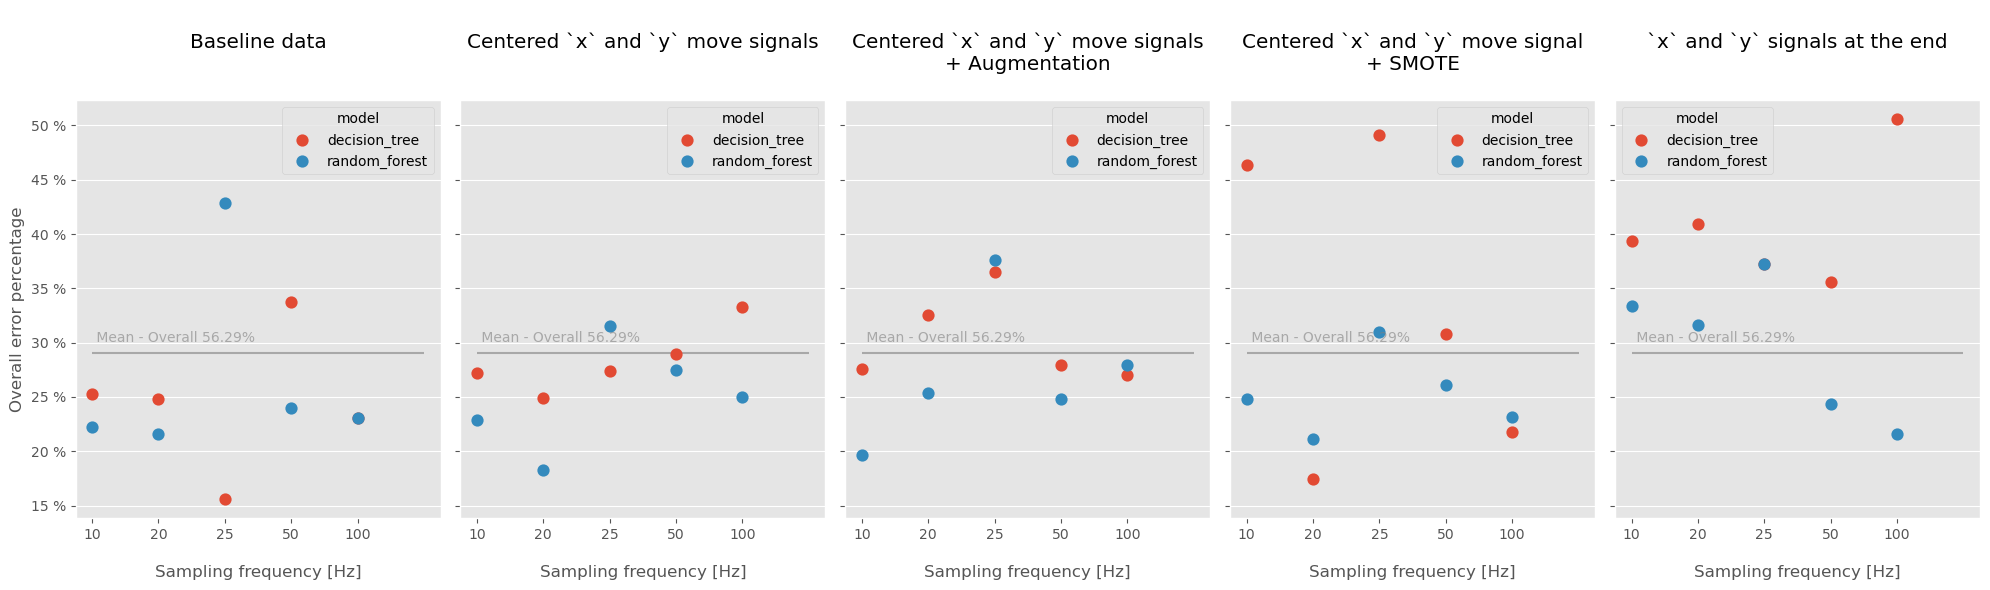

In [45]:
fig, ax = plt.subplots(ncols=5, sharey=True, figsize=(20,6))

# plots
sns.pointplot(data=df_base_mean, x='hz',y='error_percentage',hue='model',ax=ax[0], linestyles='')
sns.pointplot(data=df_centered_mean, x='hz',y='error_percentage',hue='model',ax=ax[1], linestyles='')
sns.pointplot(data=df_centered_aug_mean, x='hz',y='error_percentage',hue='model',ax=ax[2], linestyles='')
sns.pointplot(data=df_centered_smote_mean, x='hz',y='error_percentage',hue='model',ax=ax[3], linestyles='')
sns.pointplot(data=df_end_mean, x='hz',y='error_percentage',hue='model',ax=ax[4], linestyles='')

# set titles
ax[0].title.set_text('\nBaseline data\n\n')
ax[1].title.set_text('\nCentered `x` and `y` move signals\n\n')
ax[2].title.set_text('\nCentered `x` and `y` move signals\n+ Augmentation\n')
ax[3].title.set_text('\nCentered `x` and `y` move signal\n+ SMOTE\n')
ax[4].title.set_text('\n`x` and `y` signals at the end\n\n')

ax[0].set_ylabel('Overall error percentage')

# calculate overall error percentage mean
overall_error_mean = pd.concat([df_base_mean, df_centered_mean, df_centered_aug_mean, df_centered_smote_mean, df_end_mean])['error_percentage'].mean()

# plot circle mean
for c in range(5):
    ax[c].hlines(y=overall_error_mean, xmin=0, xmax=5, color='grey', alpha=0.6, zorder=0)
    ax[c].text(x=0, y=overall_error_mean+1, s=f' Mean - Overall {mean_error_circle:.2f}%', color='grey',alpha=0.6)

# removes circle, x, y labels
for c in range(1,5):
    ax[c].set_ylabel('')
    
# sets x label of the bottom row
for c in range(5):
    ax[c].set_xlabel('\nSampling frequency [Hz]') 

plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(lambda x, post: f'{int(x)} %'))
fig.tight_layout();